## Import necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

## Exploratory Data Analysis




### Define functions

In [ ]:
class ExploratoryDataAnalysis:

    def __init__(self, df, target_column):
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input 'df' must be a pandas DataFrame.")
        self.df = df
        self.target_column = target_column
        self.numeric_features = self.df.select_dtypes(include=np.number).columns.tolist()

    def show_summary(self):
        """Prints a comprehensive summary of the dataset."""
        print("--- Dataset Summary ---")
        print(f"\n5 Rows: {self.df.head(5)}")

        print("--- Dataset Summary ---")
        print(f"\nShape of the dataset: {self.df.shape}")

        print("\n--- Data Types and Non-Null Values ---")
        self.df.info()

        print("\n--- Missing Values ---")
        print(self.df.isnull().sum())

        print("\n--- Duplicate Rows ---")
        print(f"Number of duplicate rows: {self.df.duplicated().sum()}")

        print("\n--- Descriptive Statistics ---")
        print(self.df.describe().T)

        print("\n--- Class Distribution ---")
        print(self.df[self.target_column].value_counts())

    def plot_histograms(self):
        """Displays histograms for all numeric features."""
        print("\n---  Displaying Feature Distributions (Histograms) ---")
        self.df[self.numeric_features].hist(bins=20, figsize=(15, 10), layout=(2, 2), edgecolor='black')
        plt.suptitle("Histograms of All Numerical Features", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    def plot_boxplots(self):
        """Displays box plots for numeric features to check for outliers."""
        print("\n--- Displaying Feature Spread and Outliers (Box Plots) ---")
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=self.df[self.numeric_features], orient='h', palette='viridis')
        plt.title("Box Plots of Numerical Features", fontsize=16)
        plt.show()

    def plot_correlation_heatmap(self):
        """Displays a heatmap of the feature correlation matrix."""
        print("\n--- Displaying Feature Correlation (Heatmap) ---")
        correlation_matrix = self.df[self.numeric_features].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title("Correlation Matrix of Features", fontsize=16)
        plt.show()

    def plot_pairplot(self):
        """Displays a pairplot to visualize relationships between features."""
        print("\n--- Displaying Pairwise Feature Relationships ---")
        sns.pairplot(self.df, hue=self.target_column, palette='viridis', corner=True)
        plt.suptitle("Pairplot of Dataset Features", y=1.02, fontsize=16)
        plt.show()

    def identify_outliers_iqr(self):
        """Identifies and prints outliers for each numeric feature using the IQR method."""
        print("\n--- Outlier Identification (IQR Method) ---")
        for col in self.numeric_features:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]

            if not outliers.empty:
                print(f"\nPotential outliers found in '{col}':")
                print(outliers[[col]])
            else:
                print(f"\nNo outliers detected in '{col}'.")

    def run(self):
        """Executes the full EDA process, displaying all info and plots."""
        print(" Starting Comprehensive Exploratory Data Analysis...")
        print("="*50)
        self.show_summary()
        self.plot_histograms()
        self.plot_boxplots()
        self.plot_correlation_heatmap()
        self.plot_pairplot()
        print("="*50)
        print("EDA Complete.")

### Load data

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
try:
        iris_df = pd.read_csv(url, header=None, names=column_names)
        print("Data loaded successfully.")
except Exception as e:
        print(f"Failed to load data from URL. Please check your internet connection. Error: {e}")
        exit()

Data loaded successfully.


### Dataset summary

In [ ]:
eda = ExploratoryDataAnalysis(df=iris_df, target_column='species')
eda.show_summary()

--- Dataset Summary ---

5 Rows:    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
--- Dataset Summary ---

Shape of the dataset: (150, 5)

--- Data Types and Non-Null Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Histograms


--- 📊 Displaying Feature Distributions (Histograms) ---


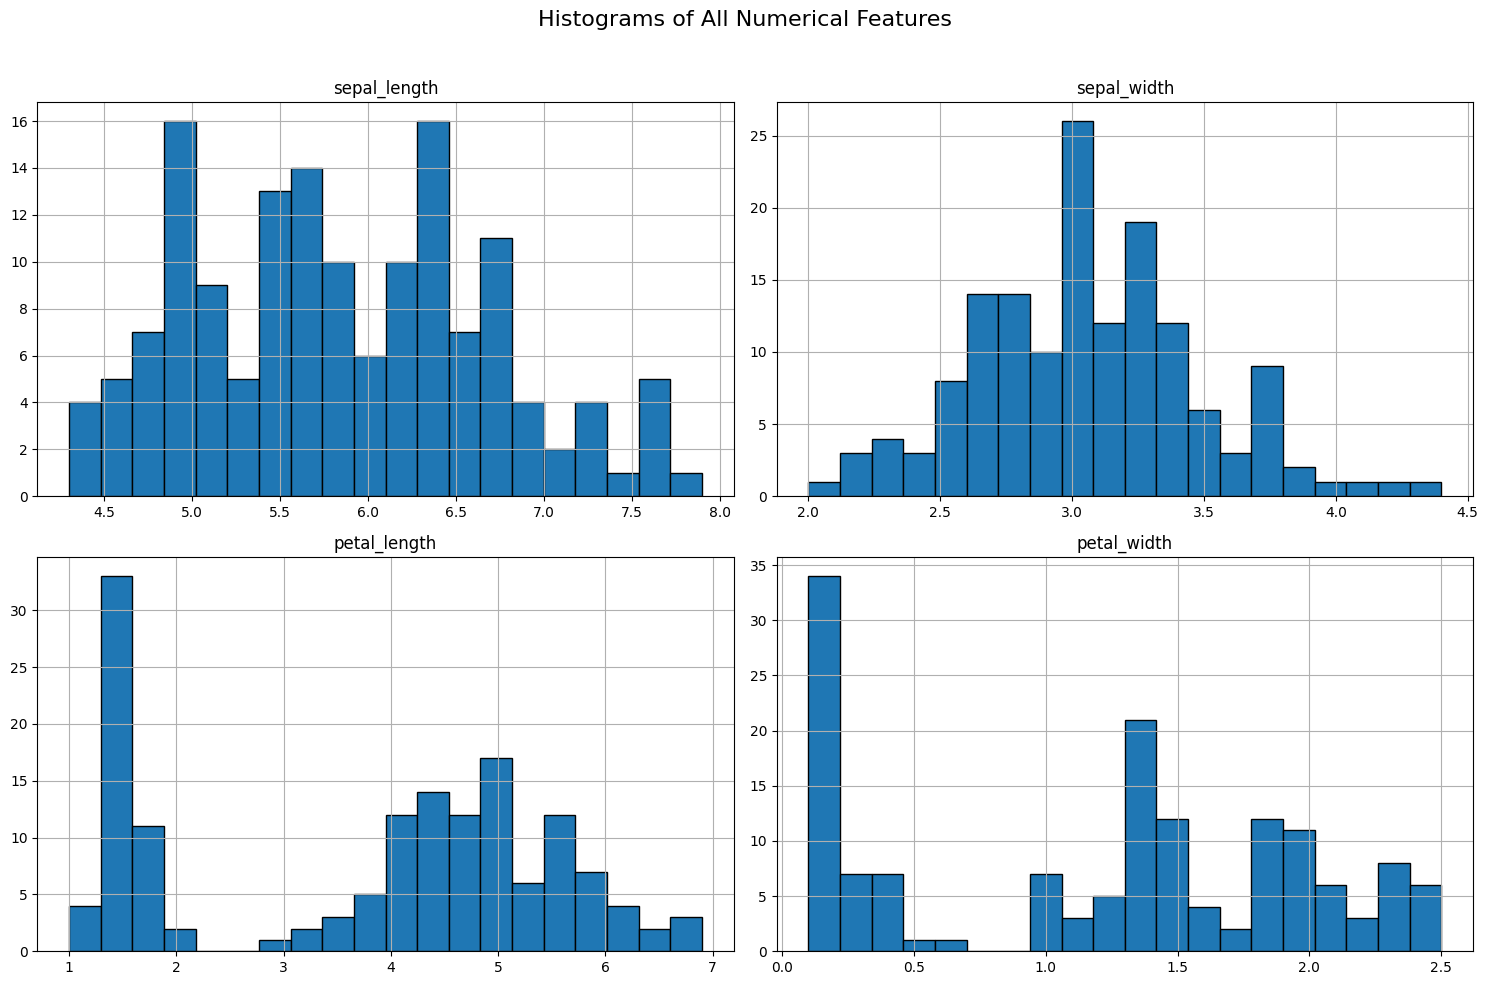

In [ ]:
eda.plot_histograms()

### Boxplots


--- 📦 Displaying Feature Spread and Outliers (Box Plots) ---


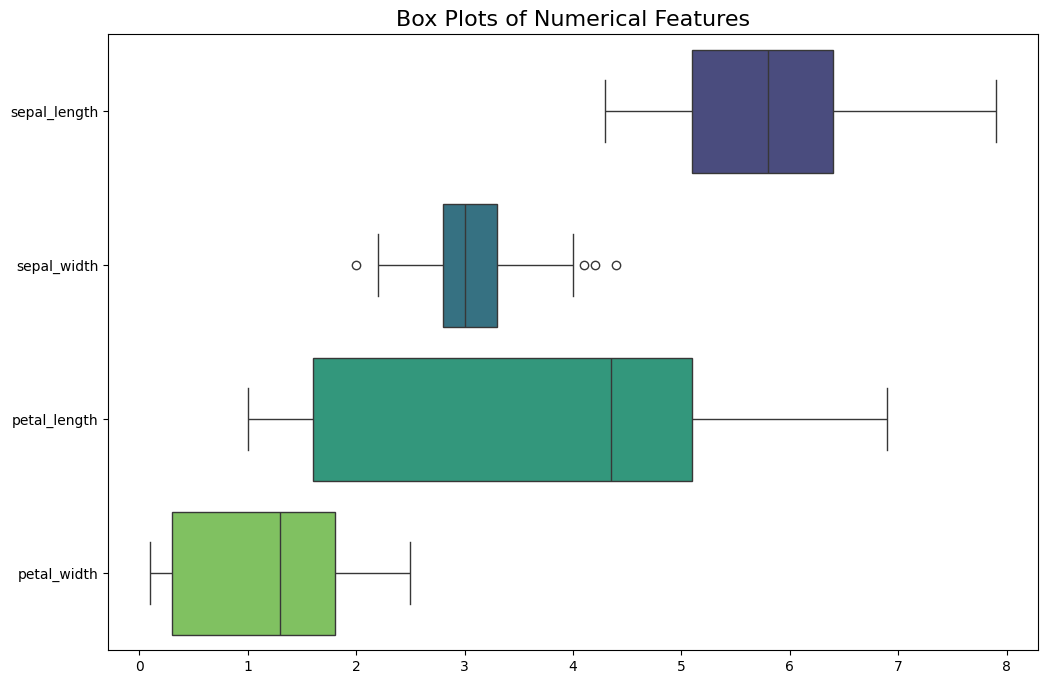

In [ ]:
eda.plot_boxplots()


### Heatmap


--- 🔥 Displaying Feature Correlation (Heatmap) ---


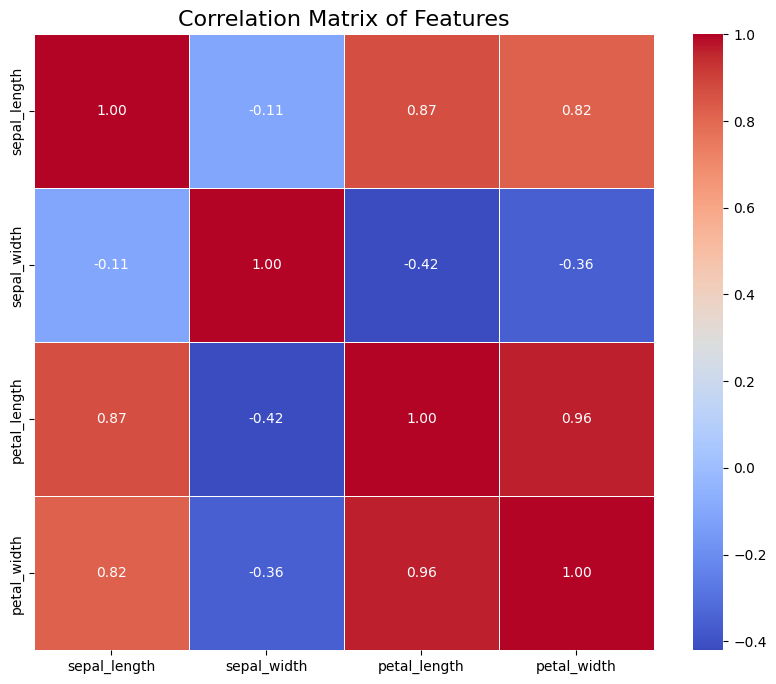

In [ ]:
eda.plot_correlation_heatmap()


### Pairplot


--- 📈 Displaying Pairwise Feature Relationships ---


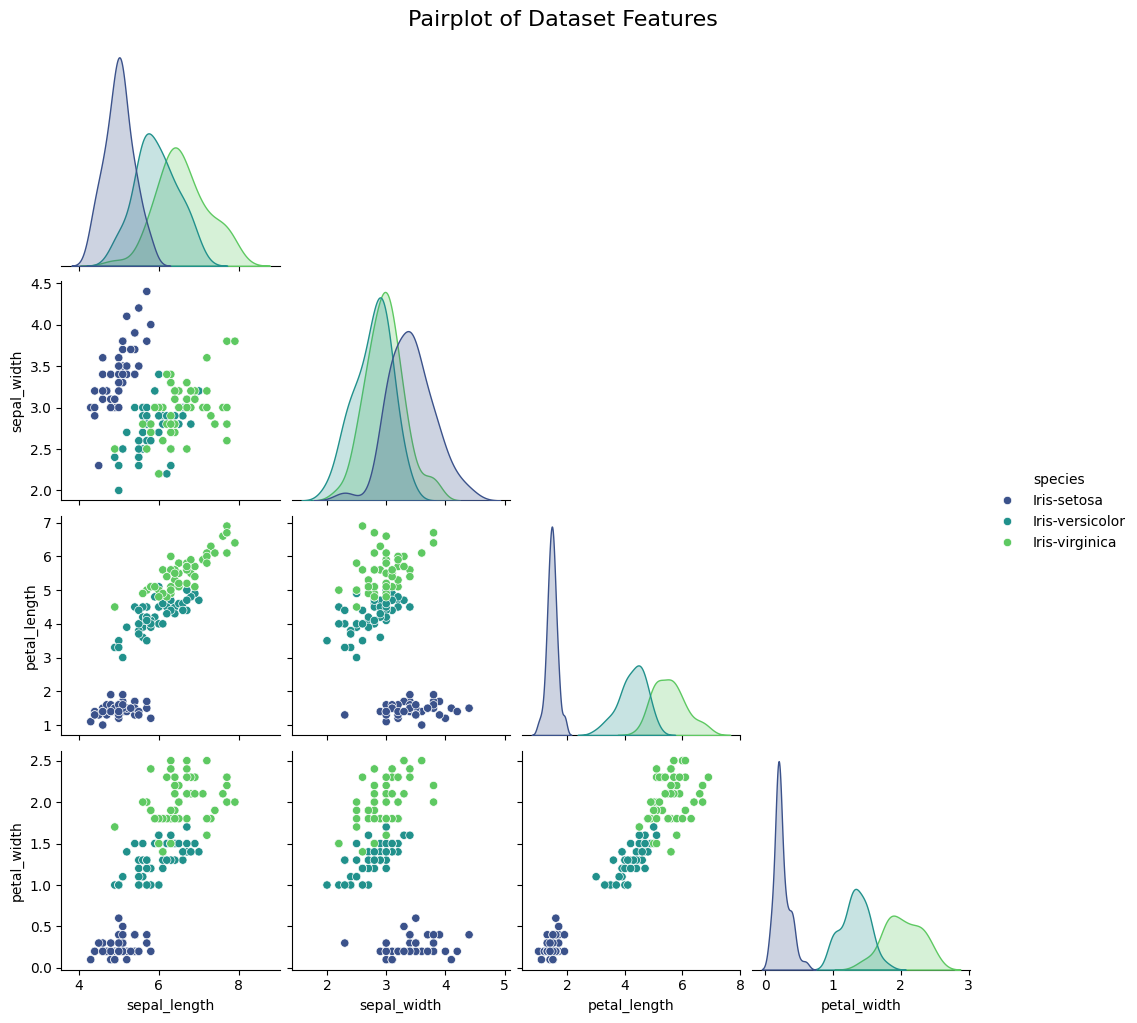

In [ ]:
eda.plot_pairplot()


In [ ]:
print("="*50, "\n EDA Complete.")

 EDA Complete.


### Outliers detections

In [ ]:
eda.identify_outliers_iqr()


--- 🧐 Outlier Identification (IQR Method) ---

No outliers detected in 'sepal_length'.

Potential outliers found in 'sepal_width':
    sepal_width
15          4.4
32          4.1
33          4.2
60          2.0

No outliers detected in 'petal_length'.

No outliers detected in 'petal_width'.


## Part (a): KNN model from scratch

### Define functions

In [ ]:

class KnnClassifierAndPipeline:
    """
    A single, consolidated class that handles both the k-NN algorithm logic
    and the entire assignment workflow, from data loading to generating final
    plots and tables.
    """
    def __init__(self, url, k_values_to_tune, roll_no="Rollno"):
        # --- Pipeline Attributes ---
        self.url = url
        self.k_values = k_values_to_tune
        self.roll_no = roll_no
        self.X, self.y = None, None
        self.feature_names, self.target_names = None, None
        self.X_train_split_scaled, self.X_test_split_scaled = None, None
        self.y_train_split, self.y_test_split = None, None
        self.tuning_results_df = None

        # --- Core Model Attributes (will be updated during execution) ---
        self.k = 3
        self.metric = 'euclidean'
        self.weights = 'uniform'
        self.X_train_fit = None
        self.y_train_fit = None


    def _calculate_distance(self, p, q):
        """Helper function to calculate distance based on the chosen metric."""
        if self.metric == 'manhattan':
            return np.sum(np.abs(p - q))
        return np.sqrt(np.sum((p - q) ** 2)) # Default: Euclidean

    def fit(self, X_train, y_train):
        """Stores the training data for the k-NN algorithm."""
        self.X_train_fit = X_train
        self.y_train_fit = y_train

    def predict(self, X_test):
        """Predicts the class for each sample in X_test."""
        return np.array([self._predict_single(x) for x in X_test])

    def _predict_single(self, x_test_sample):
        """Predicts the label for a single test sample."""
        distances = [self._calculate_distance(x_test_sample, x_train) for x_train in self.X_train_fit]
        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train_fit[i] for i in k_nearest_indices]

        if self.weights == 'uniform':
            return Counter(k_nearest_labels).most_common(1)[0][0]
        elif self.weights == 'distance':
            class_weights = {}
            for index in k_nearest_indices:
                label = self.y_train_fit[index]
                distance = distances[index]
                weight = 1 / (distance + 1e-6)
                class_weights[label] = class_weights.get(label, 0) + weight
            return max(class_weights, key=class_weights.get)

    def load_and_prepare_data(self):
        """Loads data from the UCI URL and prepares it for the pipeline."""
        column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
        try:
            df = pd.read_csv(self.url, header=None, names=column_names)
            print("Data loaded successfully from UCI repository.")
        except Exception as e:
            print(f" Failed to load data. Error: {e}")
            return False

        self.feature_names = column_names[:-1]
        X_data = df.drop('species', axis=1).values

        le = LabelEncoder()
        y_data = le.fit_transform(df['species'])
        self.target_names = le.classes_

        X_train, X_test, y_train, y_test = train_test_split(
            X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
        )

        scaler = StandardScaler()
        self.X_train_split_scaled = scaler.fit_transform(X_train)
        self.X_test_split_scaled = scaler.transform(X_test)

        self.X, self.y = X_data, y_data
        self.y_train_split, self.y_test_split = y_train, y_test
        print("Data split (80/20) and features standardized.")
        return True

    def run_hyperparameter_tuning(self):
        results = []
        for k_val in self.k_values:
            # Set model parameters for this run
            self.k = k_val
            self.metric = 'euclidean'
            self.weights = 'uniform'

            # Use the class's own fit/predict methods
            self.fit(self.X_train_split_scaled, self.y_train_split)
            predictions = self.predict(self.X_test_split_scaled)
            accuracy = accuracy_score(self.y_test_split, predictions)
            results.append({'k-Value': k_val, 'Test Accuracy': accuracy})

        self.tuning_results_df = pd.DataFrame(results)
        print("Model Performance for different values of 'k':")
        self.tuning_results_df['Test Accuracy'] = self.tuning_results_df['Test Accuracy'].map('{:.2%}'.format)
        print(self.tuning_results_df.to_string(index=False))

    def generate_visualizations(self):
        """Task 2: Creates and shows the required plots."""
        # Plot 1: Accuracy vs. k-Value
        acc_df = self.tuning_results_df.copy()
        acc_df['Test Accuracy'] = acc_df['Test Accuracy'].str.rstrip('%').astype('float') / 100.0

        plt.figure(figsize=(10, 6))
        plt.plot(acc_df['k-Value'], acc_df['Test Accuracy'], marker='o', linestyle='--', color='b')
        plt.title('Model Accuracy vs. k-Value', fontsize=16)
        plt.xlabel('k (Number of Neighbors)', fontsize=12)
        plt.ylabel('Test Set Accuracy', fontsize=12)
        plt.xticks(self.k_values)
        plt.grid(True, linestyle=':')
        print("Displaying 'Accuracy vs. k-Value' plot...")
        plt.show()

    def _decision_boundary(self, i, j):
        # Plot 2 & 3: Decision Boundaries
        X_2d, y_2d = self.X[:, [i, j]], self.y
        self._plot_decision_boundary(i, j, k=1, X_2d=X_2d, y_2d=y_2d)
        self._plot_decision_boundary(i, j, k=15, X_2d=X_2d, y_2d=y_2d)

    def _plot_decision_boundary(self,i,j, k, X_2d, y_2d):
        """Helper function to create and show a single decision boundary plot."""
        scaler_2d = StandardScaler()
        X_2d_scaled = scaler_2d.fit_transform(X_2d)

        # Set model parameters for this plot
        self.k = k
        self.metric = 'euclidean'
        self.weights = 'uniform'

        # Fit and predict using the class's own methods on the 2D data
        self.fit(X_2d_scaled, y_2d)

        h = .02
        x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
        y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.figure(figsize=(10, 7))
        plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF']), alpha=0.8)

        import seaborn as sns # Imported here to keep dependencies local to function
        sns.scatterplot(
            x=X_2d_scaled[:, 0], y=X_2d_scaled[:, 1], hue=self.target_names[y_2d],
            palette=['darkred', 'darkgreen', 'darkblue'], alpha=1.0, edgecolor="black", s=60
        )
        plt.title(f'k-NN Decision Boundary (k={k})', fontsize=16)
        plt.xlabel(f'Standardized {self.feature_names[i]}')
        plt.ylabel(f'Standardized {self.feature_names[j]}')
        plt.legend(title='Species')
        print(f"Displaying decision boundary plot for k={k}...")
        plt.show()

    def run_bonus_challenge(self, k_best=7):
        """Runs the bonus challenges and prints a comparison table."""
        print(f"\n--- Bonus Challenge (using k={k_best}) ---")

        self.k = k_best
        self.fit(self.X_train_split_scaled, self.y_train_split)

        # Standard model (Euclidean, Uniform)
        self.metric, self.weights = 'euclidean', 'uniform'
        acc_std = accuracy_score(self.y_test_split, self.predict(self.X_test_split_scaled))

        # Manhattan distance model
        self.metric = 'manhattan'
        acc_man = accuracy_score(self.y_test_split, self.predict(self.X_test_split_scaled))

        # Weighted distance model
        self.metric, self.weights = 'euclidean', 'distance'
        acc_wtd = accuracy_score(self.y_test_split, self.predict(self.X_test_split_scaled))

        bonus_df = pd.DataFrame({
            'Model Configuration': [f'Standard (Euclidean, k={k_best})',
                                    f'Manhattan Distance (k={k_best})',
                                    f'Weighted Voting (k={k_best})'],
            'Test Accuracy': [f"{acc_std:.2%}", f"{acc_man:.2%}", f"{acc_wtd:.2%}"]
        })
        print(bonus_df.to_string(index=False))

    def run_all(self):
        """Executes the entire assignment pipeline in the correct order."""
        if self.load_and_prepare_data():
            self.run_hyperparameter_tuning()
            self.generate_visualizations()
            self.run_bonus_challenge()
            print("Please see the generated tables and plots displayed.")





### Create pipeline

In [ ]:
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
K_VALUES_TO_TEST = [1, 3, 5, 7, 11, 15]
YOUR_ROLL_NUMBER = "g20ait1072"
knn = KnnClassifierAndPipeline(
        url=DATA_URL,
        k_values_to_tune=K_VALUES_TO_TEST,
        roll_no=YOUR_ROLL_NUMBER
    )

### Training

In [ ]:

knn.load_and_prepare_data()

--- 📥 Part (a): Loading and Preparing Data ---
✅ Data loaded successfully from UCI repository.
✅ Data split (80/20) and features standardized.


True

### Training with different 'K'

In [ ]:
knn.run_hyperparameter_tuning()


--- ⚙️ Part (b), Task 1: Hyperparameter Tuning for 'k' ---
Model Performance for different values of 'k':
 k-Value Test Accuracy
       1        96.67%
       3        93.33%
       5        93.33%
       7        96.67%
      11        96.67%
      15        96.67%


## Part (b): Evaluation and Visualization of the KNN Model

#### Visualizations


--- Part (b), Task 2: Displaying Visualizations ---
Displaying 'Accuracy vs. k-Value' plot...


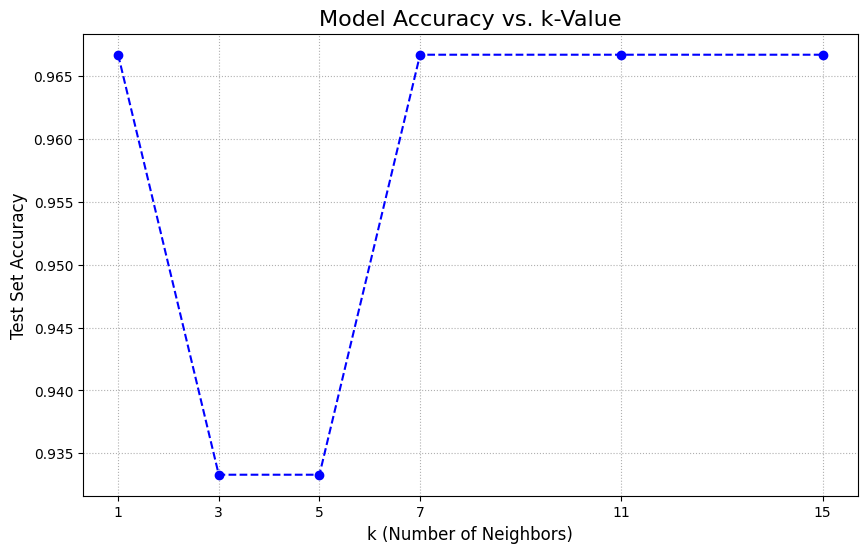

In [ ]:
knn.generate_visualizations()

### Decision boundaries

#### Petal length vs Petal width

Displaying decision boundary plot for k=1...


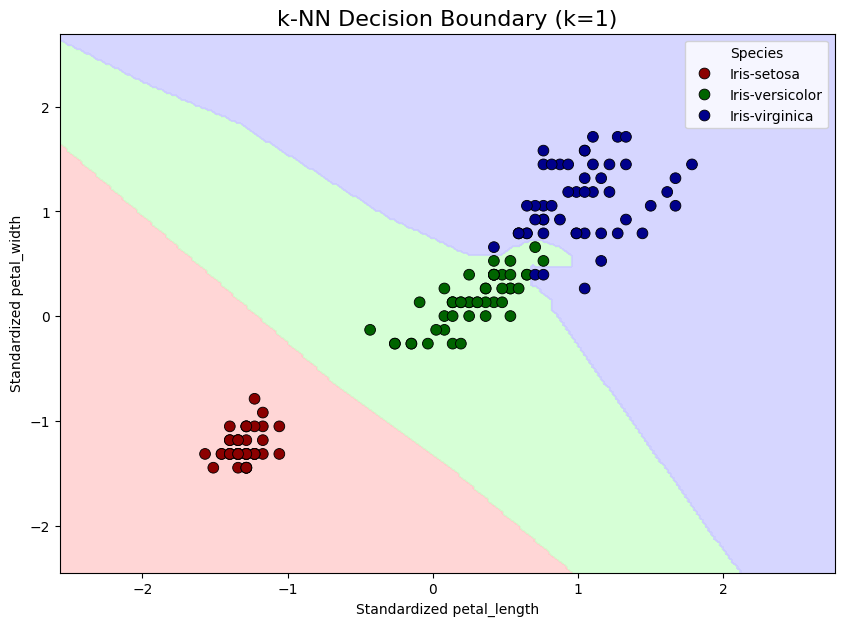

Displaying decision boundary plot for k=15...


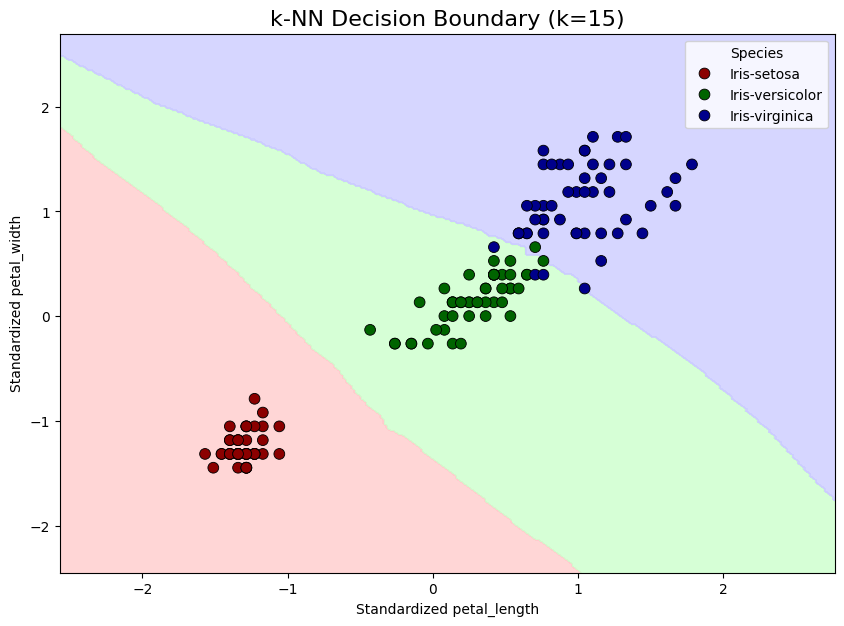

In [ ]:
knn._decision_boundary(2,3)

#### Sepal length vs Sepal width

Displaying decision boundary plot for k=1...


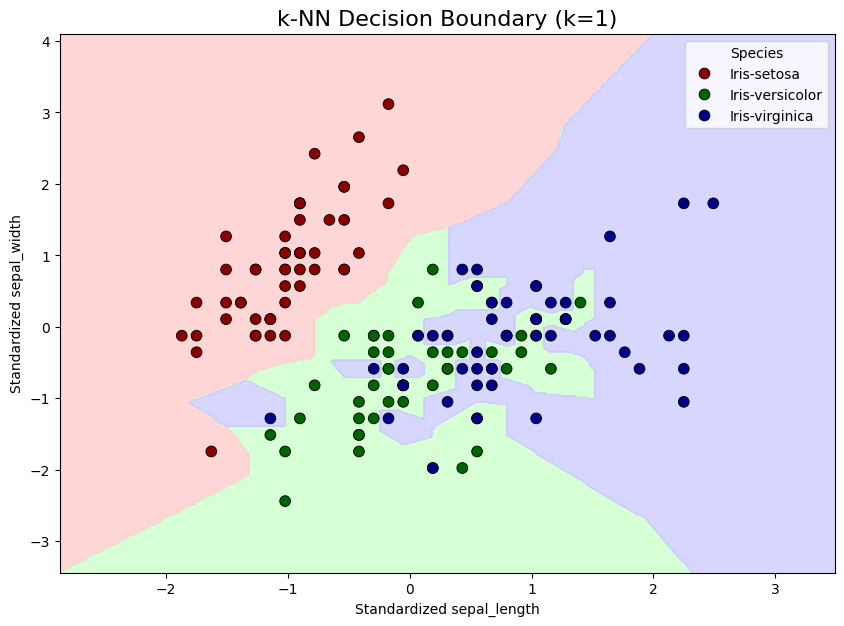

Displaying decision boundary plot for k=15...


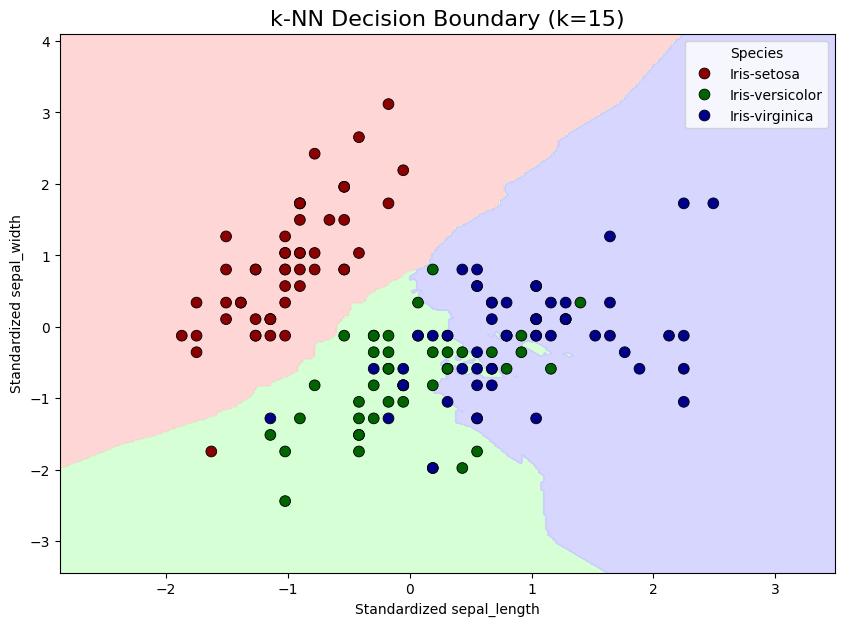

In [ ]:
knn._decision_boundary(0, 1)

#### Petal length vs Sepal width

Displaying decision boundary plot for k=1...


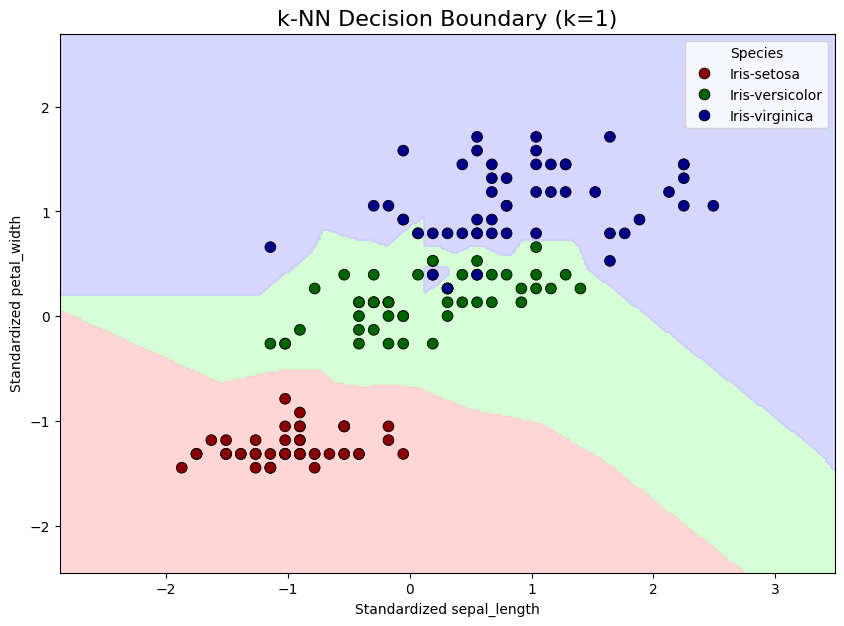

Displaying decision boundary plot for k=15...


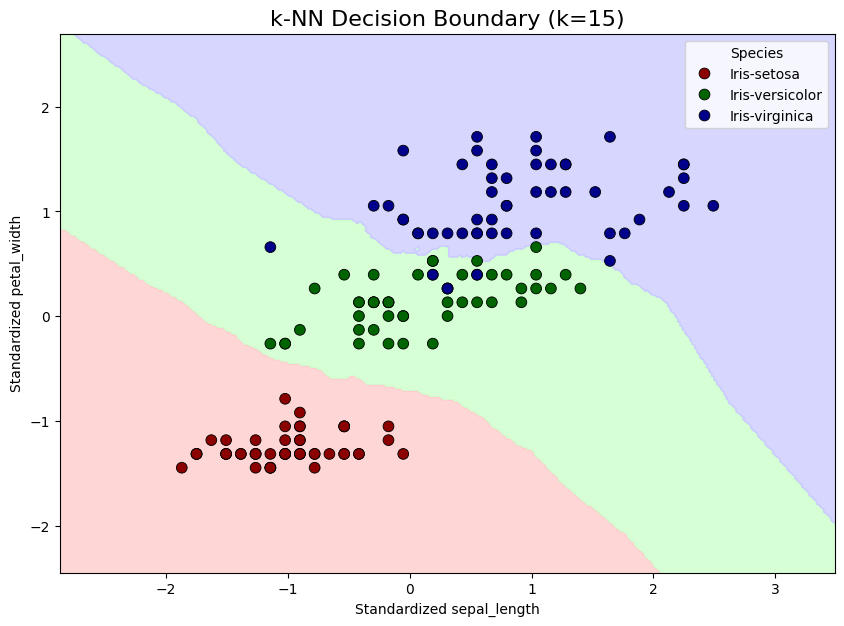

In [ ]:
knn._decision_boundary(0,3)

## Bonus challenge

In [ ]:
knn.run_bonus_challenge()


--- 🏆 Bonus Challenge (using k=7) ---
      Model Configuration Test Accuracy
Standard (Euclidean, k=7)        96.67%
 Manhattan Distance (k=7)        96.67%
    Weighted Voting (k=7)       100.00%
